# Setup

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [1]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [2]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [3]:
file_list = glob.glob('./experiments/configs/*mscoco*.json')

configs = [json.load(open(file)) for file in file_list]

In [4]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [5]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x2ccd4d8bdf0>],

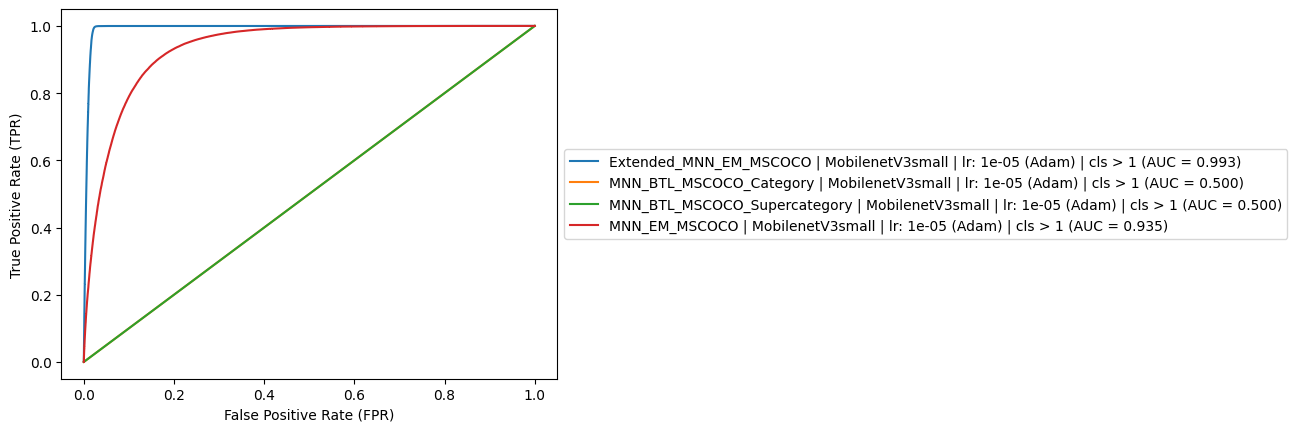

In [6]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x2ccd5128130>],

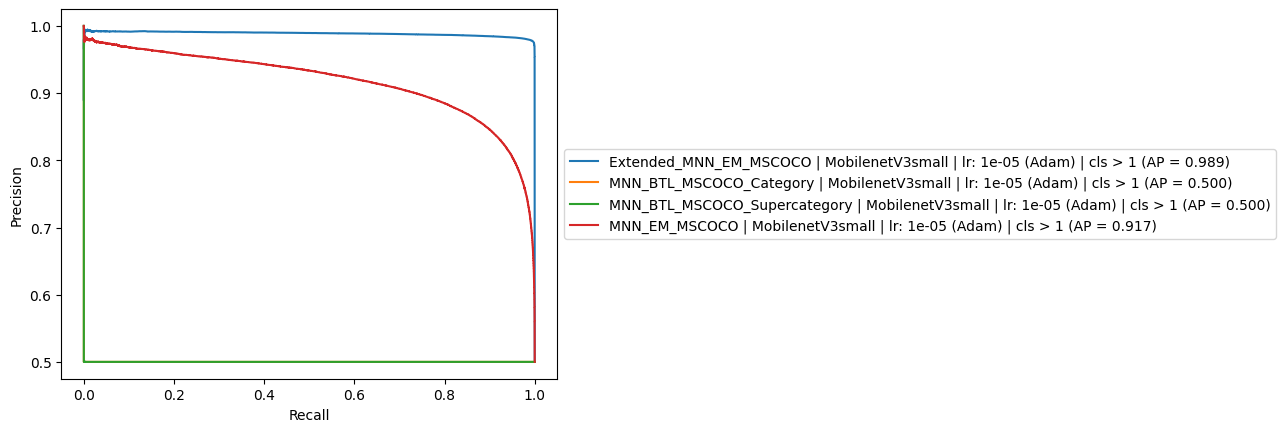

In [7]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [8]:
import pandas as pd

In [9]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])

# select metrics relevant for paper
metrics_df = metrics_df[["Model name", "Image CNN", "lr", "AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score", "Accuracy F-Score"]]
metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]] = metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]].round(4)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] * 100
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].round(2)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].astype(str)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] + " %"

# All models ranked by Accuracy

In [10]:
metrics_df.sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,Extended_MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9934,0.9887,0.9764,0.9968,0.9865,0.8773,98.63 %
3,MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9347,0.9174,0.8304,0.9234,0.8744,0.2388,86.74 %
1,MNN_BTL_MSCOCO_Category,MobilenetV3small,0.00001,0.5000,0.5000,0.5000,1.0000,0.6667,-0.9997,50.0 %
2,MNN_BTL_MSCOCO_Supercategory,MobilenetV3small,0.00001,0.5000,0.5000,0.5000,1.0000,0.6667,-0.9997,50.0 %


In [11]:
print(metrics_df.sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
                  Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
      Extended\_MNN\_EM\_MSCOCO & MobilenetV3small & 0.00001 &   0.9934 &   0.9887 &     0.9764 &  0.9968 &   0.9865 &             0.8773 &          98.63 \% \\
               MNN\_EM\_MSCOCO & MobilenetV3small & 0.00001 &   0.9347 &   0.9174 &     0.8304 &  0.9234 &   0.8744 &             0.2388 &          86.74 \% \\
     MNN\_BTL\_MSCOCO\_Category & MobilenetV3small & 0.00001 &   0.5000 &   0.5000 &     0.5000 &  1.0000 &   0.6667 &            -0.9997 &           50.0 \% \\
MNN\_BTL\_MSCOCO\_Supercategory & MobilenetV3small & 0.00001 &   0.5000 &   0.5000 &     0.5000 &  1.0000 &   0.6667 &            -0.9997 &           50.0 \% \\
\bottomrule
\end{tabular}



# MNN-EM

In [12]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
3,MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9347,0.9174,0.8304,0.9234,0.8744,0.2388,86.74 %


In [13]:
print(metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
   Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
MNN\_EM\_MSCOCO & MobilenetV3small & 0.00001 &   0.9347 &   0.9174 &     0.8304 &  0.9234 &   0.8744 &             0.2388 &          86.74 \% \\
\bottomrule
\end{tabular}



# Extended MNN-EM

In [14]:
metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,Extended_MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9934,0.9887,0.9764,0.9968,0.9865,0.8773,98.63 %


In [15]:
print(metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
            Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
Extended\_MNN\_EM\_MSCOCO & MobilenetV3small & 0.00001 &   0.9934 &   0.9887 &     0.9764 &  0.9968 &   0.9865 &             0.8773 &          98.63 \% \\
\bottomrule
\end{tabular}



# MNN-BTL

In [16]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_BTL")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
1,MNN_BTL_MSCOCO_Category,MobilenetV3small,0.00001,0.5,0.5,0.5,1.0,0.6667,-0.9997,50.0 %
2,MNN_BTL_MSCOCO_Supercategory,MobilenetV3small,0.00001,0.5,0.5,0.5,1.0,0.6667,-0.9997,50.0 %


In [17]:
print(metrics_df[metrics_df["Model name"].str.startswith("MNN_BTL")].sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
                  Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
     MNN\_BTL\_MSCOCO\_Category & MobilenetV3small & 0.00001 &      0.5 &      0.5 &        0.5 &     1.0 &   0.6667 &            -0.9997 &           50.0 \% \\
MNN\_BTL\_MSCOCO\_Supercategory & MobilenetV3small & 0.00001 &      0.5 &      0.5 &        0.5 &     1.0 &   0.6667 &            -0.9997 &           50.0 \% \\
\bottomrule
\end{tabular}

